<a href="https://colab.research.google.com/github/abhik718/Data-Science-Survival-Skills/blob/main/Ex_2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

# BAGLS dataset

In [ ]:
path = "Mini_BAGLS_dataset"  # you can use the Mini_BAGLS_dataset that we have provided for the homework

In [ ]:
# get all filenames
files = os.listdir(path)

# what is os.listdir() returning?
# type ==> list()
print(type(files))

print(files)

<class 'list'>
['0.meta', '0.png', '0_seg.png', '1.meta', '1.png', '10.meta', '10.png', '100.meta', '100.png', '1000.meta', '1000.png', '1000_seg.png', '1001.meta', '1001.png', '1001_seg.png', '1002.meta', '1002.png', '1002_seg.png', '1003.meta', '1003.png', '1003_seg.png', '1004.meta', '1004.png', '1004_seg.png', '1005.meta', '1005.png', '1005_seg.png', '1006.meta', '1006.png', '1006_seg.png', '1007.meta', '1007.png', '1007_seg.png', '1008.meta', '1008.png', '1008_seg.png', '1009.meta', '1009.png', '1009_seg.png', '100_seg.png', '101.meta', '101.png', '1010.meta', '1010.png', '1010_seg.png', '1011.meta', '1011.png', '1011_seg.png', '1012.meta', '1012.png', '1012_seg.png', '1013.meta', '1013.png', '1013_seg.png', '1014.meta', '1014.png', '1014_seg.png', '1015.meta', '1015.png', '1015_seg.png', '1016.meta', '1016.png', '1016_seg.png', '1017.meta', '1017.png', '1017_seg.png', '1018.meta', '1018.png', '1018_seg.png', '1019.meta', '1019.png', '1019_seg.png', '101_seg.png', '102.meta', '102

In [ ]:
# pathlib is a nice library to work with paths
from pathlib import Path
path_pathlib = Path(path)
path_pathlib

WindowsPath('Mini_BAGLS_dataset')

In [ ]:
# iterate over a list
for f in files:
    print(f)

In [ ]:
# get all unique filenames (e.g. each filename with file extension '.meta')
filenames = [f for f in files if '.meta' in f]
filenames

In [ ]:
# another way to combine os.listdir() and the for loop in one line --> use glob
import glob
glob_filenames = glob.glob(path + "/*.meta")
glob_filenames

In [ ]:
# get filename (separate the number from the file extension)
print(filenames[4].split(".")[0])

path_pathlib = path_pathlib / "1009.meta"
print(path_pathlib.stem)

1000
1009


In [ ]:
# iterate over the filenames (with index)
for idx, f in enumerate(filenames):
    print(idx, f)
    break

# out: Index: X, Filename: YYYY

0 0.meta


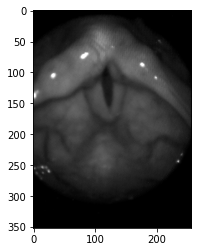

In [ ]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

## load image with different libraries
img_path = 'Mini_BAGLS_dataset/752.png'
img = io.imread(img_path)
img = Image.open(img_path)
img = skimage.io.imread(img_path)
img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# load image as grayscale
img = skimage.io.imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')

In [ ]:
# which image loading function to use?
import time
def test_read_image(imgfile, func):
    t0 = time.time()
    img = func(imgfile)
    t = time.time() - t0
    return t

functions = [io.imread, Image.open, skimage.io.imread, cv2.imread]

times = []
for func in functions:
    ts = []
    # load each image
    for f in filenames:
        name = f.split(".")[0]
        t = test_read_image(os.path.join(path, name + ".png"), func)
        ts.append(t)
    times.append(ts)

In [ ]:
# Note: we are calculating the mean time for each image loading method here
for t, func in zip(times, functions):
    print(str(func))
    print("{:.6f} seconds".format(np.mean(t)))
    print("_____")

<function imread at 0x000002B77F36FF70>
0.002260 seconds
_____
<function open at 0x000002B77E6B5790>
0.000077 seconds
_____
<function imread at 0x000002B714D319D0>
0.002308 seconds
_____
<built-in function imread>
0.001374 seconds
_____


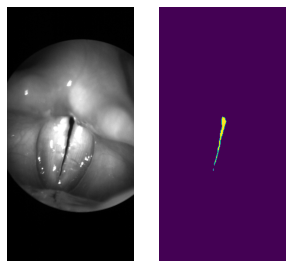

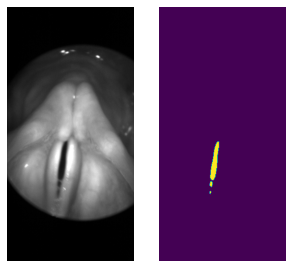

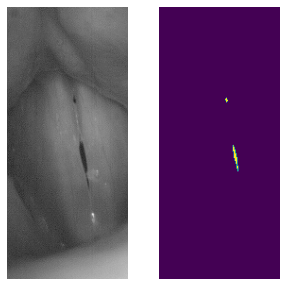

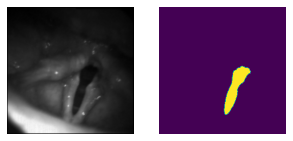

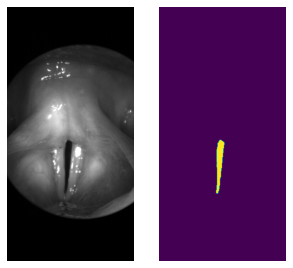

In [ ]:
for idx, f in enumerate(glob_filenames):
    # make sure to only look at the first 5 samples and not all 2000 of them
    if idx == 5:
        break

    # get basename
    basename = os.path.basename(f)

    # split name
    name = basename.split(".")[0]

    # load image and segmentation mask
    img_path = os.path.join(path, name + ".png")
    seg_path = os.path.join(path, name + "_seg.png")
    img = io.imread(img_path)
    seg = io.imread(seg_path)

    # visualize image and segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
    ax1.axis("off"); ax2.axis("off")

    # show both
    ax1.imshow(img);ax2.imshow(seg)
    plt.show()

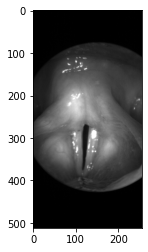

In [ ]:
ref_image = img
plt.imshow(ref_image)

In [ ]:
# saving with different formats

# tif
io.imwrite("saved_image.tif", ref_image)

# png
io.imwrite("saved_image.png", ref_image)

# jpg
io.imwrite("saved_image90.jpg", ref_image, quality=90) # quality specifies how much the saved JPEG image should be compressed
io.imwrite("saved_image10.jpg", ref_image, quality=10)

Text(0, 0.5, 'File size [bytes]')

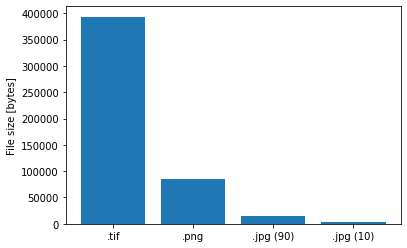

In [ ]:
# check out memory footprints
img_tif_size = os.path.getsize("saved_image.tif")
img_png_size = os.path.getsize("saved_image.png")
img_jpg90_size = os.path.getsize("saved_image90.jpg")
img_jpg10_size = os.path.getsize("saved_image10.jpg")

plt.bar([0, 1, 2, 3], [img_tif_size, img_png_size, img_jpg90_size, img_jpg10_size])
plt.xticks([0, 1, 2, 3], [".tif", ".png", ".jpg (90)", ".jpg (10)"])
plt.ylabel("File size [bytes]")

### Check out exercise slide here --> JPEG compression

In [ ]:
# load images
img_tif = io.imread("saved_image.tif")
img_png = io.imread("saved_image.png")
img_jpg90 = io.imread("saved_image90.jpg")
img_jpg10 = io.imread("saved_image90.jpg")

In [ ]:
# compare them to each other
np.allclose(ref_image, img_tif)
np.allclose(ref_image, img_png)
np.allclose(ref_image, img_jpg90)
#np.allclose(ref_image, img_jpg10)

False

### Calculate [PSNR](https://www.ni.com/de-de/innovations/white-papers/11/peak-signal-to-noise-ratio-as-an-image-quality-metric.html) between images

![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)

In [ ]:
def psnr(img1, img2):
    #mean squared error:
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "MSE is zero"
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [ ]:
print(psnr(ref_image, img_tif))
print(psnr(ref_image, img_png))
print(psnr(ref_image, img_jpg))

print(psnr(ref_image, np.random.randint(0, 255, ref_image.shape)))

MSE is zero
MSE is zero
43.10206432178723
6.638444170732882


In [ ]:
import pandas as pd

# get all meta data information
all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)

df = pd.DataFrame(all_meta_data)
df

,Video Id,Camera,Sampling rate (Hz),"Video resolution (px, HxW)",Color,Endoscope orientation,Endoscope application,Age range (yrs),Subject sex,Subject disorder status,Segmenter,Post-processed
0,37,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,20-30,w,healthy,0,1
1,277,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,,w,healthy,0,1
2,567,KayPentax HSV 9710 (Photron),6000,"[288, 128]",False,70°,oral,40-50,m,healthy,1,2
3,163,HERS 5562 Endocam Wolf,4000,"[256, 256]",False,70°,oral,80-90,m,functional,1,2
4,232,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,50-60,w,healthy,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,536,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,20-30,w,healthy,0,2
1996,329,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,50-60,m,healthy,0,2
1997,238,HERS 5562 Endocam Wolf,4000,"[256, 256]",True,90°,oral,50-60,w,Muscle tension dysphonia,0,1
1998,618,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,20-30,w,Muscle tension dysphonia,0,1


In [ ]:
df.to_csv("metadata.csv")

## Load Glottis video from BAGLS

In [ ]:
vid_path = path + "/glottis_video.mp4"  # you can use any arbitrary .mp4 video here or download a glottis video from here: https://www.bagls.org/

In [ ]:
from IPython.display import Video
Video(vid_path)

In [ ]:
# load video using scikit-video

import skvideo.io
glottis_video = skvideo.io.vread(path + "/glottis_video.mp4")
glottis_video.shape

(30, 512, 256, 3)

In [ ]:
# load video using imageio

import imageio
glottis_video = imageio.mimread(path + "/glottis_video.mp4")
np.asarray(glottis_video).shape

(30, 512, 256, 3)

In [ ]:
import ipywidgets as widgets

alpha_slider = widgets.FloatSlider(
    value=1.,
    min=0,
    max=1.0,
    step=0.01,
    description='Alpha',
)

@widgets.interact(n=(0, len(glottis_video)-1))
def f(n=5, alpha=alpha_slider):
    plt.imshow(glottis_video[n], alpha=alpha)

interactive(children=(IntSlider(value=5, description='n', max=29), FloatSlider(value=1.0, description='Alpha',…

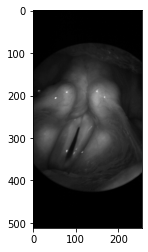

In [ ]:
# load video frame by frame by creating an iterable reader object

vid_reader = imageio.get_reader(path + "/glottis_video.mp4",  'ffmpeg')

for frame in vid_reader.iter_data():
    plt.imshow(frame)
    break

In [ ]:
# JSON files
metadata = vid_reader.get_meta_data()
metadata

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122',
 'codec': 'h264',
 'pix_fmt': 'yuv420p',
 'fps': 10.0,
 'source_size': (256, 512),
 'size': (256, 512),
 'rotate': 0,
 'duration': 3.0}

In [ ]:
import json

with open('video_metadata_example.json', 'w') as f:
    json.dump(metadata, f, indent=2)

In [ ]:
with open('video_metadata_example.json', 'r') as f:
    data = json.load(f)
data

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122',
 'codec': 'h264',
 'pix_fmt': 'yuv420p',
 'fps': 10.0,
 'source_size': [256, 512],
 'size': [256, 512],
 'rotate': 0,
 'duration': 3.0}

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4",
                 glottis_video,   # video
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'veryslow']) # Maximum compression: veryslow,
                                                         # maximum speed: ultrafast

# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

3314783

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4",
                 glottis_video,   # video
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'ultrafast']) # Maximum compression: veryslow,
                                                         # maximum speed: ultrafast

# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

4368088

In [ ]:
# compare original loaded videeo and the saved video

saved_vid = imageio.mimread("saved_video.mp4")
np.allclose(glottis_video, saved_vid)

True

In [ ]:
# Flammkuchen
import flammkuchen as fl

d = {
    'tabular': pd.DataFrame(np.random.random((20,40))), # random tabular data
     'videos': np.random.randint(0, 256, (30, 256, 256, 3)).astype(np.uint8), # random video
     'json': dict(name='John Doe', age=32, gender="d") # random meta data
}

fl.save("my_hdf5_file.h5", d)

In [ ]:
fl.meta("my_hdf5_file.h5")

{'json': DictNode(age=ValueNode(type=<class 'numpy.int32'>), gender=ValueNode(type=<class 'numpy.str_'>), name=ValueNode(type=<class 'numpy.str_'>)),
 'tabular': PandasDataFrameNode((40, 20)),
 'videos': NumpyArrayNode(shape=(30, 256, 256, 3), dtype=uint8)}

In [ ]:
random_video = fl.load("my_hdf5_file.h5", "/videos")
random_video.shape

(30, 256, 256, 3)

In [ ]:
# And only a portion of the video, e.g. only the red channel of the first 5 frames
r_first_5_frames = fl.load("my_hdf5_file.h5", "/videos", sel=fl.aslice[:5, ..., 0])
r_first_5_frames.shape

(5, 256, 256)